In [43]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv(r'C:\Users\mrai4\Downloads\IPL.csv')

In [44]:
df.head(10)

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,133,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,179,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,208,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,161,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,149,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22
5,6,"March 30,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Kolkata,Group,Banglore,Field,128,10,132,7,Banglore,Wickets,3,Wanindu Hasaranga,Sherfane Rutherford,28,Wanindu Hasaranga,4--20
6,7,"March 31,2022","Brabourne Stadium, Mumbai",Chennai,Lucknow,Group,Lucknow,Field,210,7,211,4,Lucknow,Wickets,6,Evin Lewis,Quinton de Kock,61,Ravi Bishnoi,2--24
7,8,"April 1,2022","Wankhede Stadium, Mumbai",Kolkata,Punjab,Group,Kolkata,Field,137,10,141,4,Kolkata,Wickets,6,Umesh Yadav,Andre Russell,70,Umesh Yadav,4--23
8,9,"April 2,2022","Dr DY Patil Sports Academy, Mumbai",Mumbai,Rajasthan,Group,Mumbai,Field,193,8,170,8,Rajasthan,Runs,23,Jos Buttler,Jos Buttler,100,Jasprit Bumrah,3--17
9,10,"April 2,2022","Maharashtra Cricket Association Stadium,Pune",Delhi,Gujarat,Group,Delhi,Field,171,6,157,9,Gujarat,Runs,14,Lockie Ferguson,Shubman Gill,84,Lockie Ferguson,4--28


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   match_id             74 non-null     int64 
 1   date                 74 non-null     object
 2   venue                74 non-null     object
 3   team1                74 non-null     object
 4   team2                74 non-null     object
 5   stage                74 non-null     object
 6   toss_winner          74 non-null     object
 7   toss_decision        74 non-null     object
 8   first_ings_score     74 non-null     int64 
 9   first_ings_wkts      74 non-null     int64 
 10  second_ings_score    74 non-null     int64 
 11  second_ings_wkts     74 non-null     int64 
 12  match_winner         74 non-null     object
 13  won_by               74 non-null     object
 14  margin               74 non-null     int64 
 15  player_of_the_match  74 non-null     object
 16  top_scorer

In [46]:
df.shape

(74, 20)

In [47]:
df.isnull().sum()

match_id               0
date                   0
venue                  0
team1                  0
team2                  0
stage                  0
toss_winner            0
toss_decision          0
first_ings_score       0
first_ings_wkts        0
second_ings_score      0
second_ings_wkts       0
match_winner           0
won_by                 0
margin                 0
player_of_the_match    0
top_scorer             0
highscore              0
best_bowling           0
best_bowling_figure    0
dtype: int64

most matches win by team

<Axes: xlabel='match_winner'>

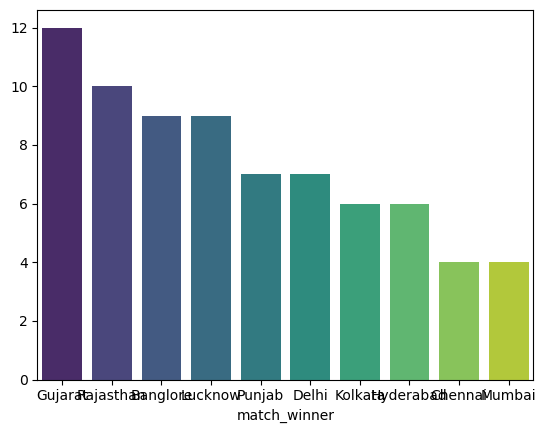

In [48]:
match_wins=df['match_winner'].value_counts()
sns.barplot(x=match_wins.index,y=match_wins.values,palette='viridis')

Toss decision trends

Text(0.5, 1.0, 'Toss Decision Trends')

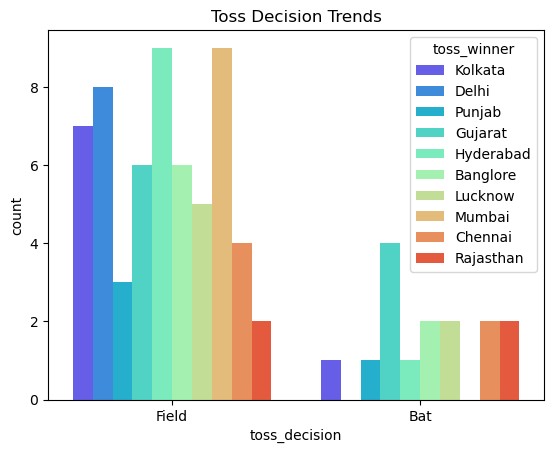

In [49]:
sns.countplot(df,x='toss_decision',palette='rainbow',hue='toss_winner')
plt.title('Toss Decision Trends')

In [50]:
!pip install plotly

In [51]:
import plotly.express as px

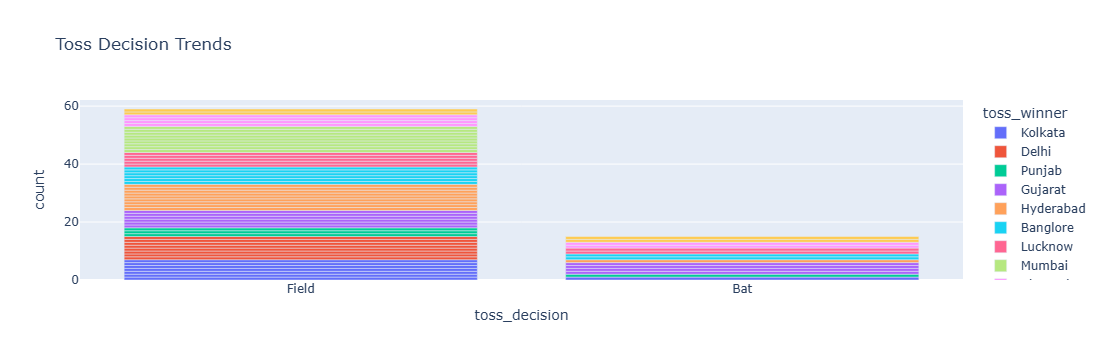

In [52]:
px.bar(df,x='toss_decision',
      title='Toss Decision Trends',color='toss_winner')

Toss winner vs Match winner

In [53]:
count=df[df['toss_winner']==df['match_winner']]['match_id'].count()
percentage=(count*100)/df.shape[0]
percentage

np.float64(48.648648648648646)

How do team win?(Runs Vs Wickets)

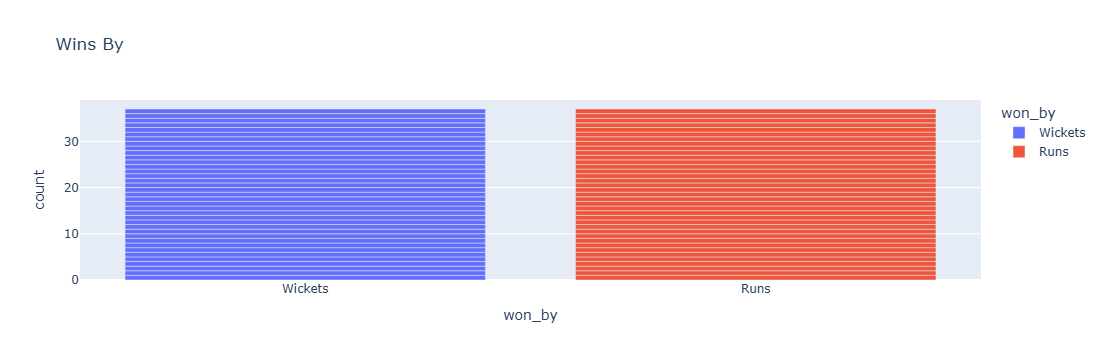

In [66]:
px.bar(df,x='won_by',color='won_by',title="Wins By")

Key Player Performances

In [74]:
df1=df['player_of_the_match'].value_counts().head(10)  #player of the match

<Axes: ylabel='player_of_the_match'>

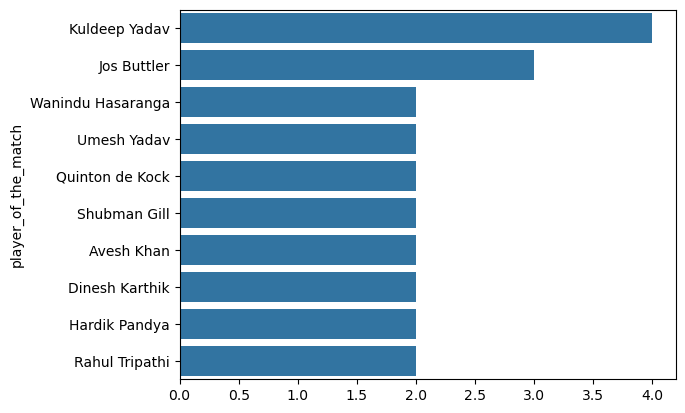

In [87]:
sns.barplot(x=df1.values,y=df1.index)


In [111]:
m=df.groupby('top_scorer')['highscore'].sum().sort_values(ascending=False).head(4)

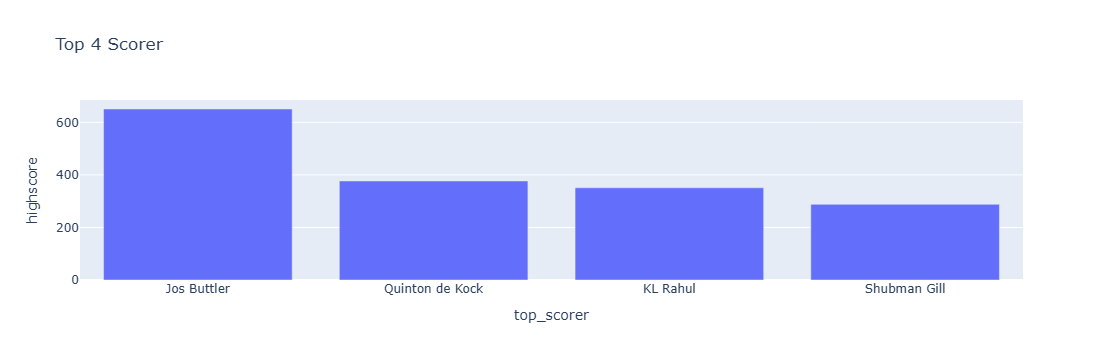

In [118]:
px.bar(m,y='highscore',title="Top 4 Scorer")

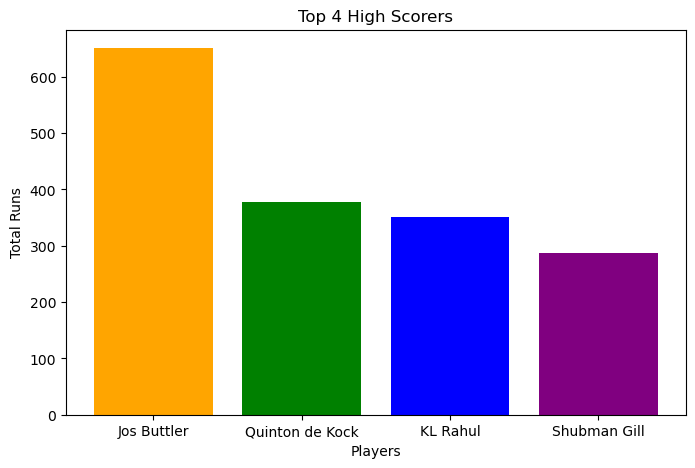

In [114]:
import matplotlib.pyplot as plt

# Data from your output
players = ["Jos Buttler", "Quinton de Kock", "KL Rahul", "Shubman Gill"]
runs = [651, 377, 351, 288]

# Plot
plt.figure(figsize=(8,5))
plt.bar(players, runs, color=['orange','green','blue','purple'])
plt.xlabel("Players")
plt.ylabel("Total Runs")
plt.title("Top 4 High Scorers")
plt.show()

Venue Analysis

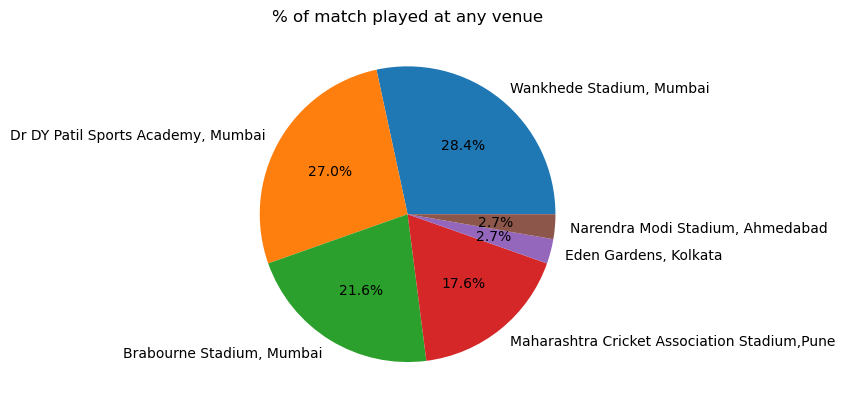

In [135]:
grounds=df['venue'].value_counts()
plt.pie(grounds,labels=grounds.index,autopct="%1.1f%%")
plt.title('% of match played at any venue')
plt.show()